# Global versus local PCA

In this notebook we present how global and local PCA can be performed using `pca_impl`.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import PCAfold.pca_impl as PCA
from sklearn.cluster import KMeans

# Set some initial parameters:
global_color = '#6a6e7a'
k1_color = '#0e7da7'
k2_color = '#ceca70'
PC_color = '#000000'
data_point = 4
font_size = 16
save_plots = False
font_text = 20
line_width = 1
n_points = 1000

# Fonts:
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}

In [2]:
def local_pca(X, idx):

    n_k = len(np.unique(idx))

    # Initialize the outputs:
    PCs = []
    eigvals = []
    PC_scores = []

    for k in range(0, n_k):

        # Extract local cluster:
        X_k = X[idx==k]

        # Perform PCA in a local cluster:
        pca = P.PCA(X, 'none', 2, useXTXeig=True)
        PC_scores.append(pca.transform(X_k))
        PCs.append(pca.Q)
        eigvals.append(pca.explained_variance_ratio_)

    return (PCs, eigvals, PC_scores)

TypeError: 'module' object is not callable

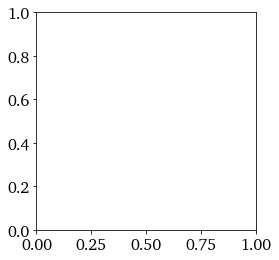

In [3]:
figure = plt.figure(figsize=(13, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# First subplot
figureSubplot = plt.subplot(gs[0])

# Generate randomized dataset with linearity
q = 1
# Data generation:

mean1 = [0,1] # data already centered
covariance1 = [[3.4, 1.1], [1.1, 2.1]]
x1, y1 = np.random.multivariate_normal(mean1, covariance1, n_points).T

y = np.linspace(0,4,n_points)
x = -(y**2) + 7*y + 4
y = y + y1
x = x + x1
Dataset = np.column_stack((np.concatenate([x]), np.concatenate([y])))
Dataset_proc = Dataset - np.mean(Dataset, axis=0)

# Perform PCA
pca = PCA()
pca.fit(Dataset)
scores = pca.transform(Dataset)
PCs = pca.components_
eigvals = pca.explained_variance_ratio_

Dataset_projected = np.dot(Dataset_proc, np.transpose(pca.components_[:q,:]))
Dataset_approx = np.dot(pca.transform(Dataset)[:,:q], pca.components_[:q,:]) + np.mean(Dataset, axis=0)

plt.scatter(Dataset_proc[:,0], Dataset_proc[:,1], s=data_point, color=global_color, marker='o', linewidth=line_width)
# The strange notation for the eigenvals is to match the methodology of `scale` option,
# since the larger it is, the shorter the vector.
plt.quiver(PCs[0,0], PCs[0,1], scale=40*(1-eigvals[0]), color=PC_color, width=0.014)
plt.quiver(PCs[1,0], PCs[1,1], scale=10*(1-eigvals[1]), color=PC_color, width=0.014)
plt.axis('equal')
plt.yticks([]), plt.xticks([])
plt.title('Globally applied PCA', **csfont, fontsize=font_text, color=PC_color)
plt.scatter(0, 0, color=PC_color, marker='x', lineWidth=data_point, s=20);

# Second subplot
figureSubplot = plt.subplot(gs[1])

# Data generation:
mean1 = [0,1] # data already centered
covariance1 = [[2, 0.5], [0.5, 0.5]]
x1, y1 = np.random.multivariate_normal(mean1, covariance1, n_points).T

mean2 = [6, 4] # data already centered
covariance2 = [[3, 0.3], [0.3, 0.5]]
x2, y2 = np.random.multivariate_normal(mean2, covariance2, n_points).T

X = np.column_stack((np.concatenate([x1, x2]), np.concatenate([y1, y2])))

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
idx = kmeans.labels_
centroids = kmeans.cluster_centers_
(PCs, eigvals, PC_scores) = local_pca(X, idx)

plt.axis('equal')

plt.scatter(X[idx==0,0], X[idx==0,1], s=data_point, c=k1_color, marker='o')
plt.scatter(X[idx==1,0], X[idx==1,1], s=data_point, c=k2_color, marker='o')

origin = [centroids[0][0]], [centroids[0][1]]
plt.quiver(*origin, PCs[0][0,0], PCs[0][0,1], scale=30*(1-eigvals[0][0]), color=PC_color, width=0.007)
origin = [centroids[0][0]], [centroids[0][1]]
plt.quiver(*origin, PCs[0][1,0], PCs[0][1,1], scale=15*(1-eigvals[0][1]), color=PC_color, width=0.007)
origin = [centroids[1][0]], [centroids[1][1]]
plt.quiver(*origin, PCs[1][0,0], PCs[1][0,1], scale=30*(1-eigvals[1][0]), color=PC_color, width=0.007)
origin = [centroids[1][0]], [centroids[1][1]]
plt.quiver(*origin, PCs[1][1,0], PCs[1][1,1], scale=15*(1-eigvals[1][1]), color=PC_color, width=0.007)
plt.title('Locally applied PCA', **csfont, fontsize=font_text, color=PC_color)
plt.yticks([]), plt.xticks([])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color=PC_color, marker='x', lineWidth=data_point, s=20);

if save_plots==True: plt.savefig('../images/tutorial-pca-global-local-pca.png', dpi = 500, bbox_inches='tight')